In [61]:
import skimage.io
import numpy as np
import sys
from pathlib import Path
import matplotlib.pyplot as plt

In [55]:
class TileMaker:
    
    def __init__(self, size, number):
        self.size = size
        self.number = number
        
    def make(self, image, mask):
        
        h, w, c = image.shape
        horizontal_pad = 0 if (w % self.size) == 0 else self.size - (w % self.size)
        vertical_pad = 0 if (h % self.size) == 0 else self.size - (h % self.size)
        
        image = np.pad(image, pad_width=((vertical_pad//2, vertical_pad - vertical_pad//2), 
                                         (horizontal_pad//2, horizontal_pad - horizontal_pad//2),
                                         (0, 0)), 
                       mode='constant', constant_values=255)  # Empty is white in this data
        
        mask = np.pad(mask, pad_width=((vertical_pad//2, vertical_pad - vertical_pad//2), 
                                       (horizontal_pad//2, horizontal_pad - horizontal_pad//2),
                                       (0, 0)), 
                       mode='constant', constant_values=0)  # Empty is black in this data
        
        h, w, c = image.shape
        image = image.reshape(h // self.size, self.size, w // self.size, self.size, c)
        image = image.swapaxes(1, 2).reshape(-1, self.size, self.size, c)
        mask = mask.reshape(h // self.size, self.size, w // self.size, self.size, c)
        mask = mask.swapaxes(1, 2).reshape(-1, self.size, self.size, c)
        
        if image.shape[0] < self.number:
            image = np.pad(image, pad_width=((0, self.number - image.shape[0]), (0, 0), (0, 0), (0 ,0)),
                           mode='constant', constant_values=255)
            mask = np.pad(mask, pad_width=((0, self.number - mask.shape[0]), (0, 0), (0, 0), (0 ,0)),
                          mode='constant', constant_values=0)
        
        # Find the images with the most stuff (the less white):
        sorted_tiles = np.argsort(np.sum(image, axis=(1, 2, 3)))
        sorted_tiles = sorted_tiles[:self.number]
        
        return image[sorted_tiles], mask[sorted_tiles]

In [56]:
tile_maker = TileMaker(128, 16)

In [57]:
TRAIN_PATH = Path('G:/Datasets/panda/train_images/')
MASKS_TRAIN_PATH = Path('G:/Datasets/panda/train_label_masks/')
OUTPUT_IMG_PATH = Path('G:/Datasets/panda/train_tiles/imgs/')
OUTPUT_MASK_PATH = Path('G:/Datasets/panda/train_tiles/masks/')
SAVE_FULL = True

In [58]:
OUTPUT_IMG_PATH.mkdir(exist_ok=True, parents=True)
OUTPUT_MASK_PATH.mkdir(exist_ok=True, parents=True)

In [62]:
img_list = list(TRAIN_PATH.glob('**/*.tiff'))
for i, img_fn in enumerate(img_list):
    img_id = img_fn.stem
    mask_fn = MASKS_TRAIN_PATH/(img_id + '_mask.tiff')
    # image = skimage.io.imread(img_fn, plugin='tifffile')
    image = skimage.io.MultiImage(str(img_fn))[-1]
    if mask_fn.exists():
        # mask = skimage.io.imread(MASKS_TRAIN_PATH/(img_id + '_mask.tiff'), plugin='tifffile')
        mask = skimage.io.MultiImage(str(mask_fn))[-1]
    else:
        mask = np.zeros_like(image)
        
    image, mask = tile_maker.make(image, mask)
    sys.stdout.write(f'\r{i + 1}/{len(img_list)}')
    
    if SAVE_FULL:
        full_image = image.reshape(4, 4, 128, 128, 3).swapaxes(1, 2).reshape(4*128, 4*128, 3)
        full_mask = mask.reshape(4, 4, 128, 128, 3).swapaxes(1, 2).reshape(4*128, 4*128, 3)
        skimage.io.imsave(OUTPUT_IMG_PATH/(img_id +'.png'), full_image, check_contrast=False)
        skimage.io.imsave(OUTPUT_MASK_PATH/(img_id +'.png'), full_mask, check_contrast=False)
    else:
        for i, (tile_image, tile_mask) in enumerate(zip(image, mask)):
            skimage.io.imsave(OUTPUT_IMG_PATH/(img_id + '_' + str(i) + '.png'), tile_image, check_contrast=False)
            skimage.io.imsave(OUTPUT_MASK_PATH/(img_id +'_' + str(i) + '.png'), tile_mask, check_contrast=False)

5763/10616

G:\Anaconda3\envs\fastai\lib\site-packages\skimage\external\tifffile\tifffile.py:2117: UserWarning: corrupted page list at offset 9394200
  warnings.warn("corrupted page list at offset %i" % offset)


PermissionError: [Errno 13] Permission denied

In [27]:
a = skimage.io.MultiImage(str(img_fn))[1]
a.shape

(1920, 512, 3)

In [28]:
str(img_fn)

'G:\\Datasets\\panda\\train_images\\006f6aa35a78965c92fffd1fbd53a058.tiff'

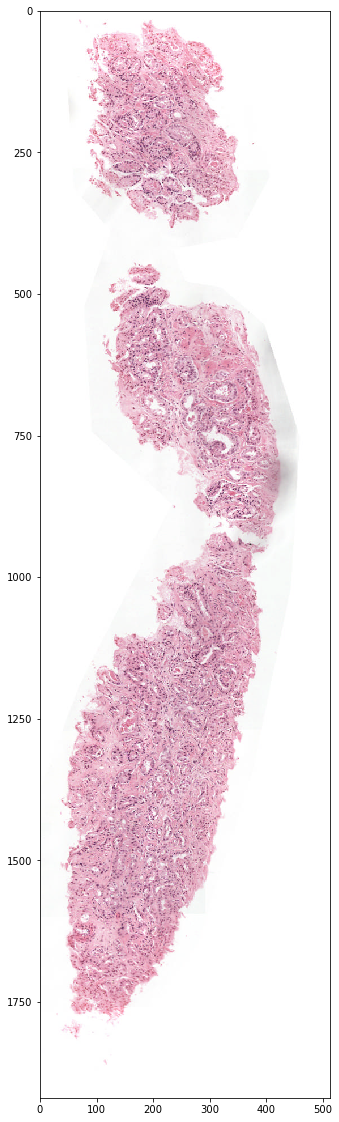

In [29]:
plt.figure(figsize=(20, 20))
plt.imshow(a)

In [20]:
b = skimage.io.imread(img_fn, plugin='tifffile')

In [21]:
b.shape

(7680, 2048, 3)

In [43]:
image.shape

(480, 128, 3)

In [6]:
image, mask = tile_maker.make(image, mask)

In [7]:
skimage.io.imsave()

(230, 216, 128, 128, 3)

In [ ]:
tiles = image.reshape(230, 128, 128, 3)

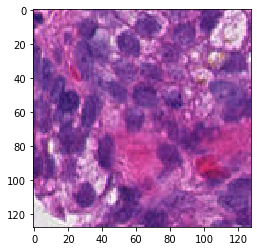

In [44]:
plt.imshow(image[-1])

In [34]:
tiles

(29440, 27648, 3)

In [49]:
skimage.io.MultiImage(img_fn)

TypeError: 'WindowsPath' object is not iterable

In [47]:
img_fn

WindowsPath('G:/Datasets/panda/train_images/ffe9bcababc858e04840669e788065a1.tiff')

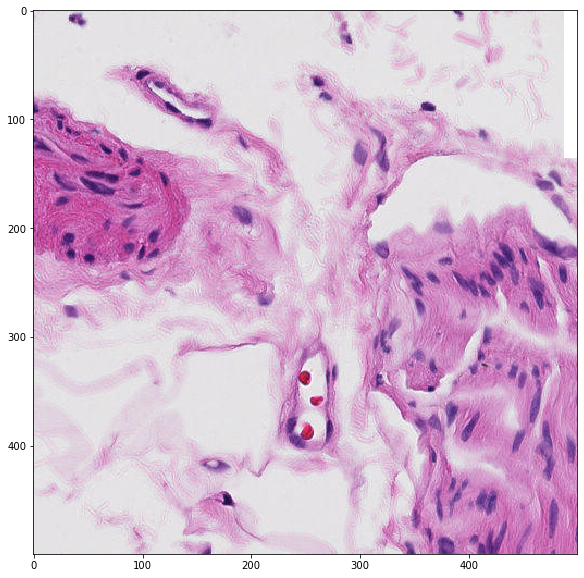

In [35]:
plt.figure(figsize=(10, 10))
plt.imshow(tiff_image[5000:5500, 5000:5500])

In [24]:
5000//128

39

In [32]:
4*128

512